In [92]:
#imported the 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [93]:
#read the dataset and some information about it
data_df = pd.read_csv('framingham.csv')
data_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [94]:
#information about dataset 
data_df.info

<bound method DataFrame.info of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0
4238     1   40        3.0  ...       67.0     72.0           0
4239     0   39        3.0  ...       85.0     80.0           0

[4240 rows x 16 columns]>

In [95]:
#information about dataset
data_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [96]:
#information about dataset
data_df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [97]:
#verify if there are any null values
print(f'Number of null values in dataset: {data_df.isnull().sum().sum()}')
print('Number of null values for every column: ')
print(f'{data_df.isnull().sum()}')

Number of null values in dataset: 645
Number of null values for every column: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [98]:
#replace the null values with mean value 
for column_name in data_df.columns:
    data_df[column_name] = data_df[column_name].fillna(data_df[column_name].mode()[0])
print(f'Number of null values in dataset: {data_df.isnull().sum().sum()}')
print('Number of null values for every column: ')
print(f'{data_df.isnull().sum()}') 
#print(f'{len(data_df.columns)}')

Number of null values in dataset: 0
Number of null values for every column: 
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


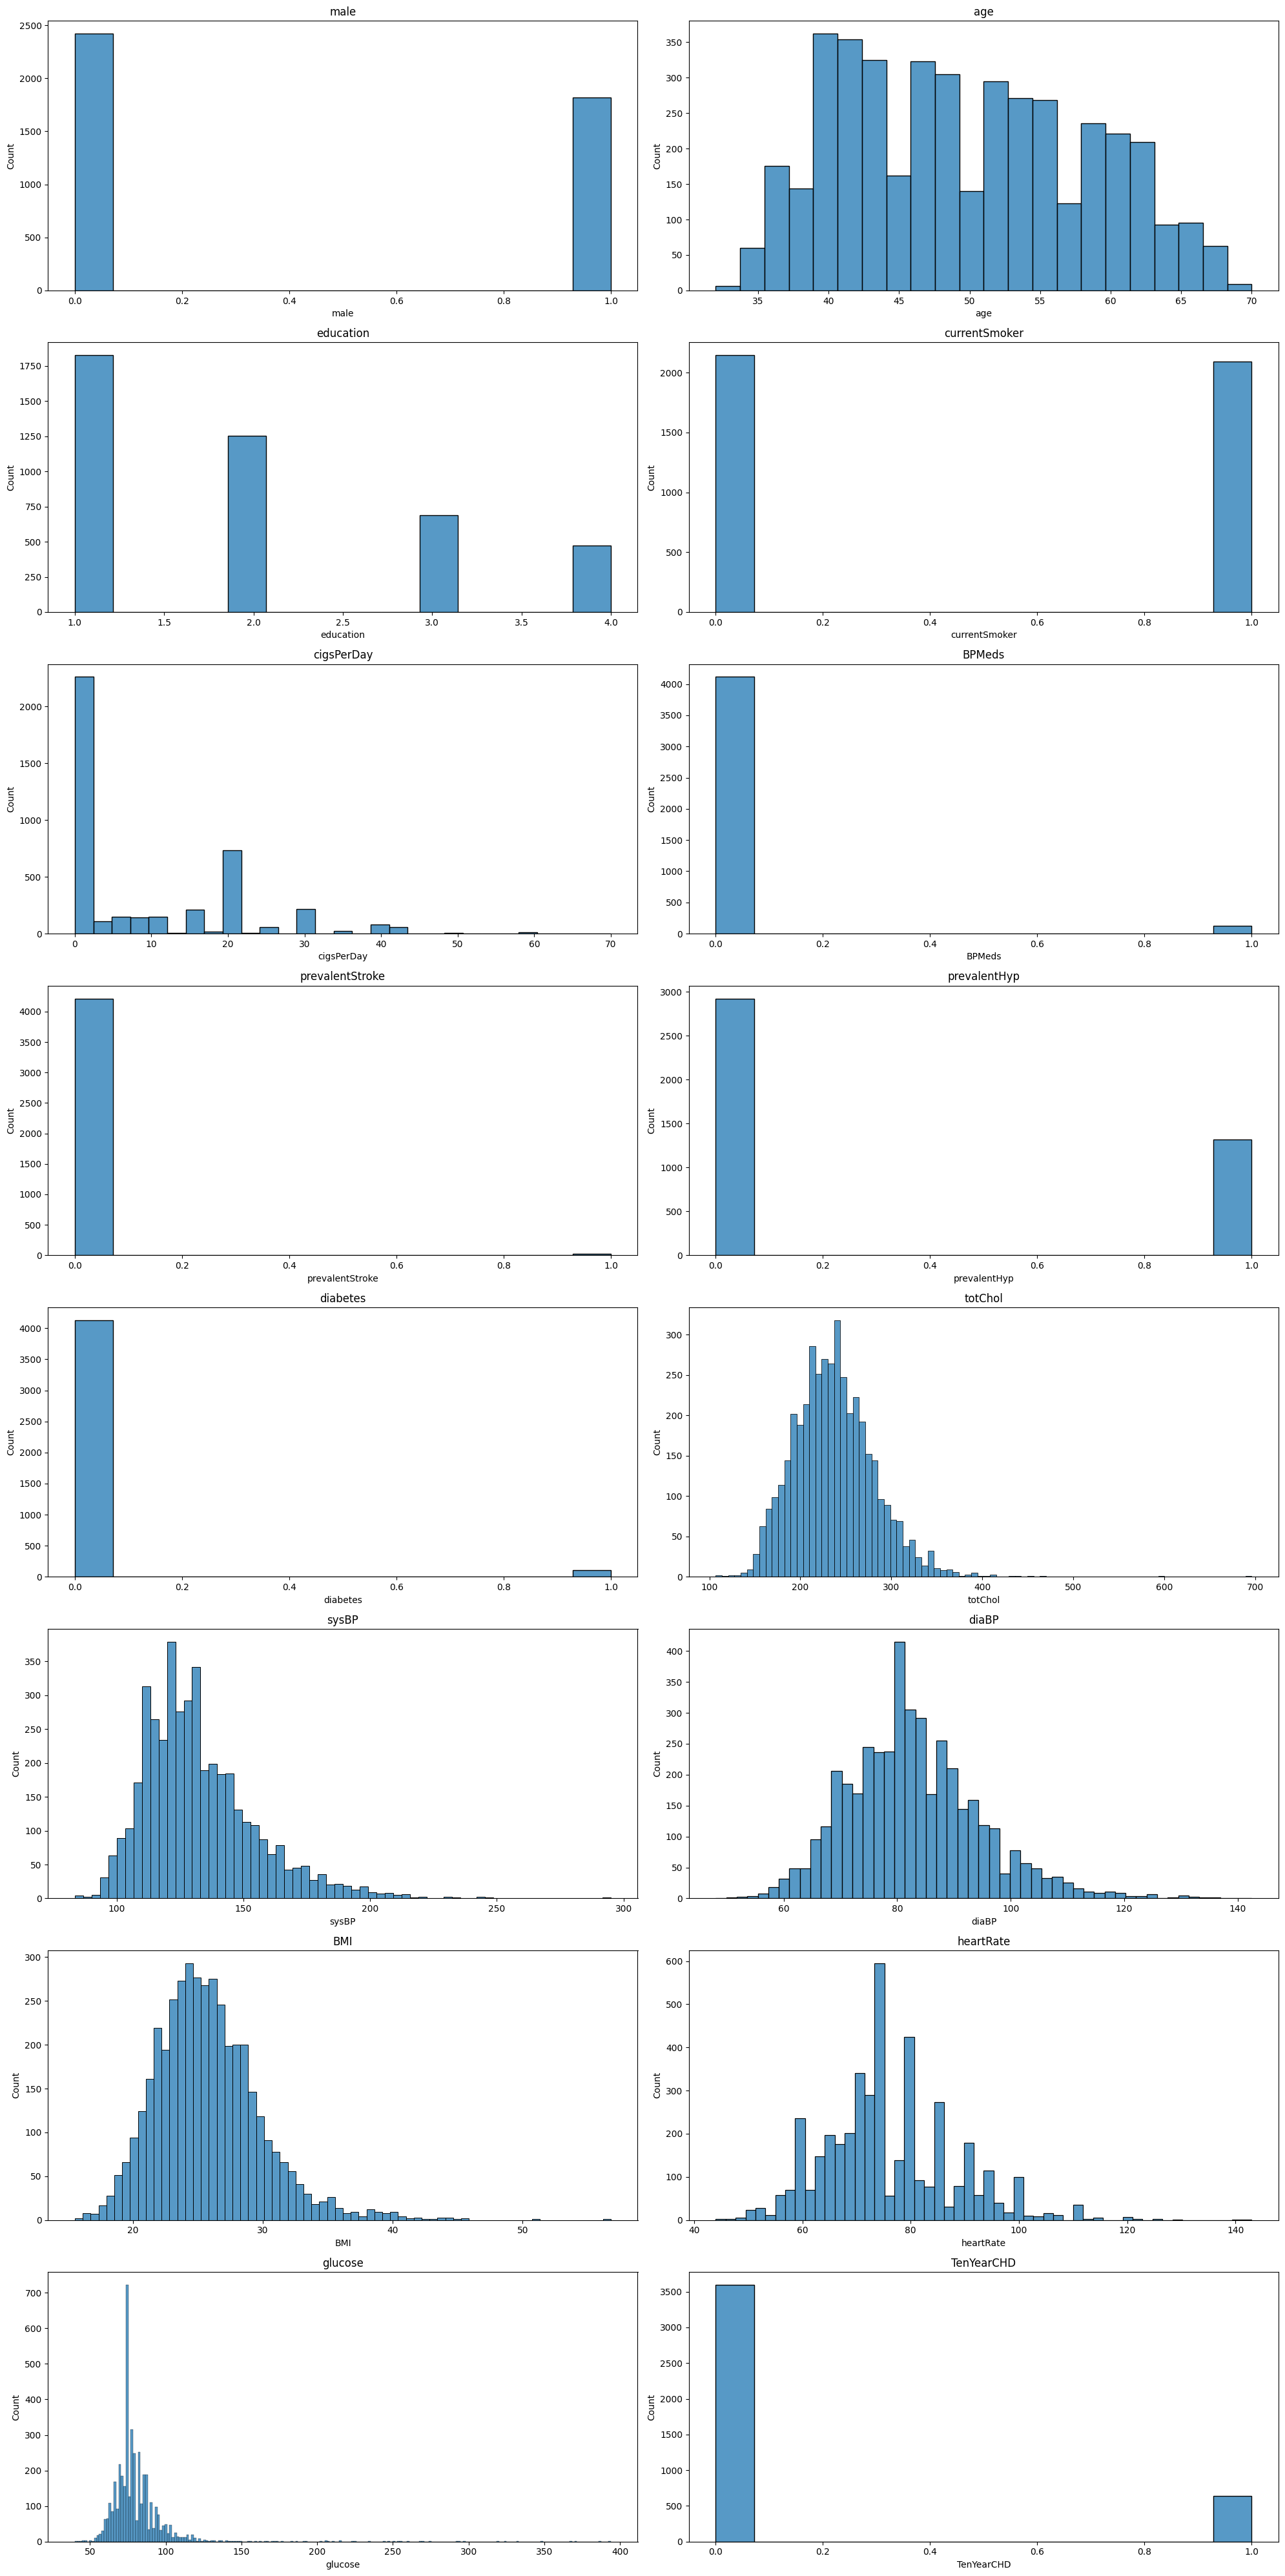

In [99]:
#plot every column barplot
fig, axes = plt.subplots(8, 2, figsize=(20,40))
for i, ax in enumerate(axes.flatten()):
    if i < len(data_df.columns): 
        sns.histplot(data_df.iloc[:, i], ax = ax)
        ax.set_title(data_df.columns[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


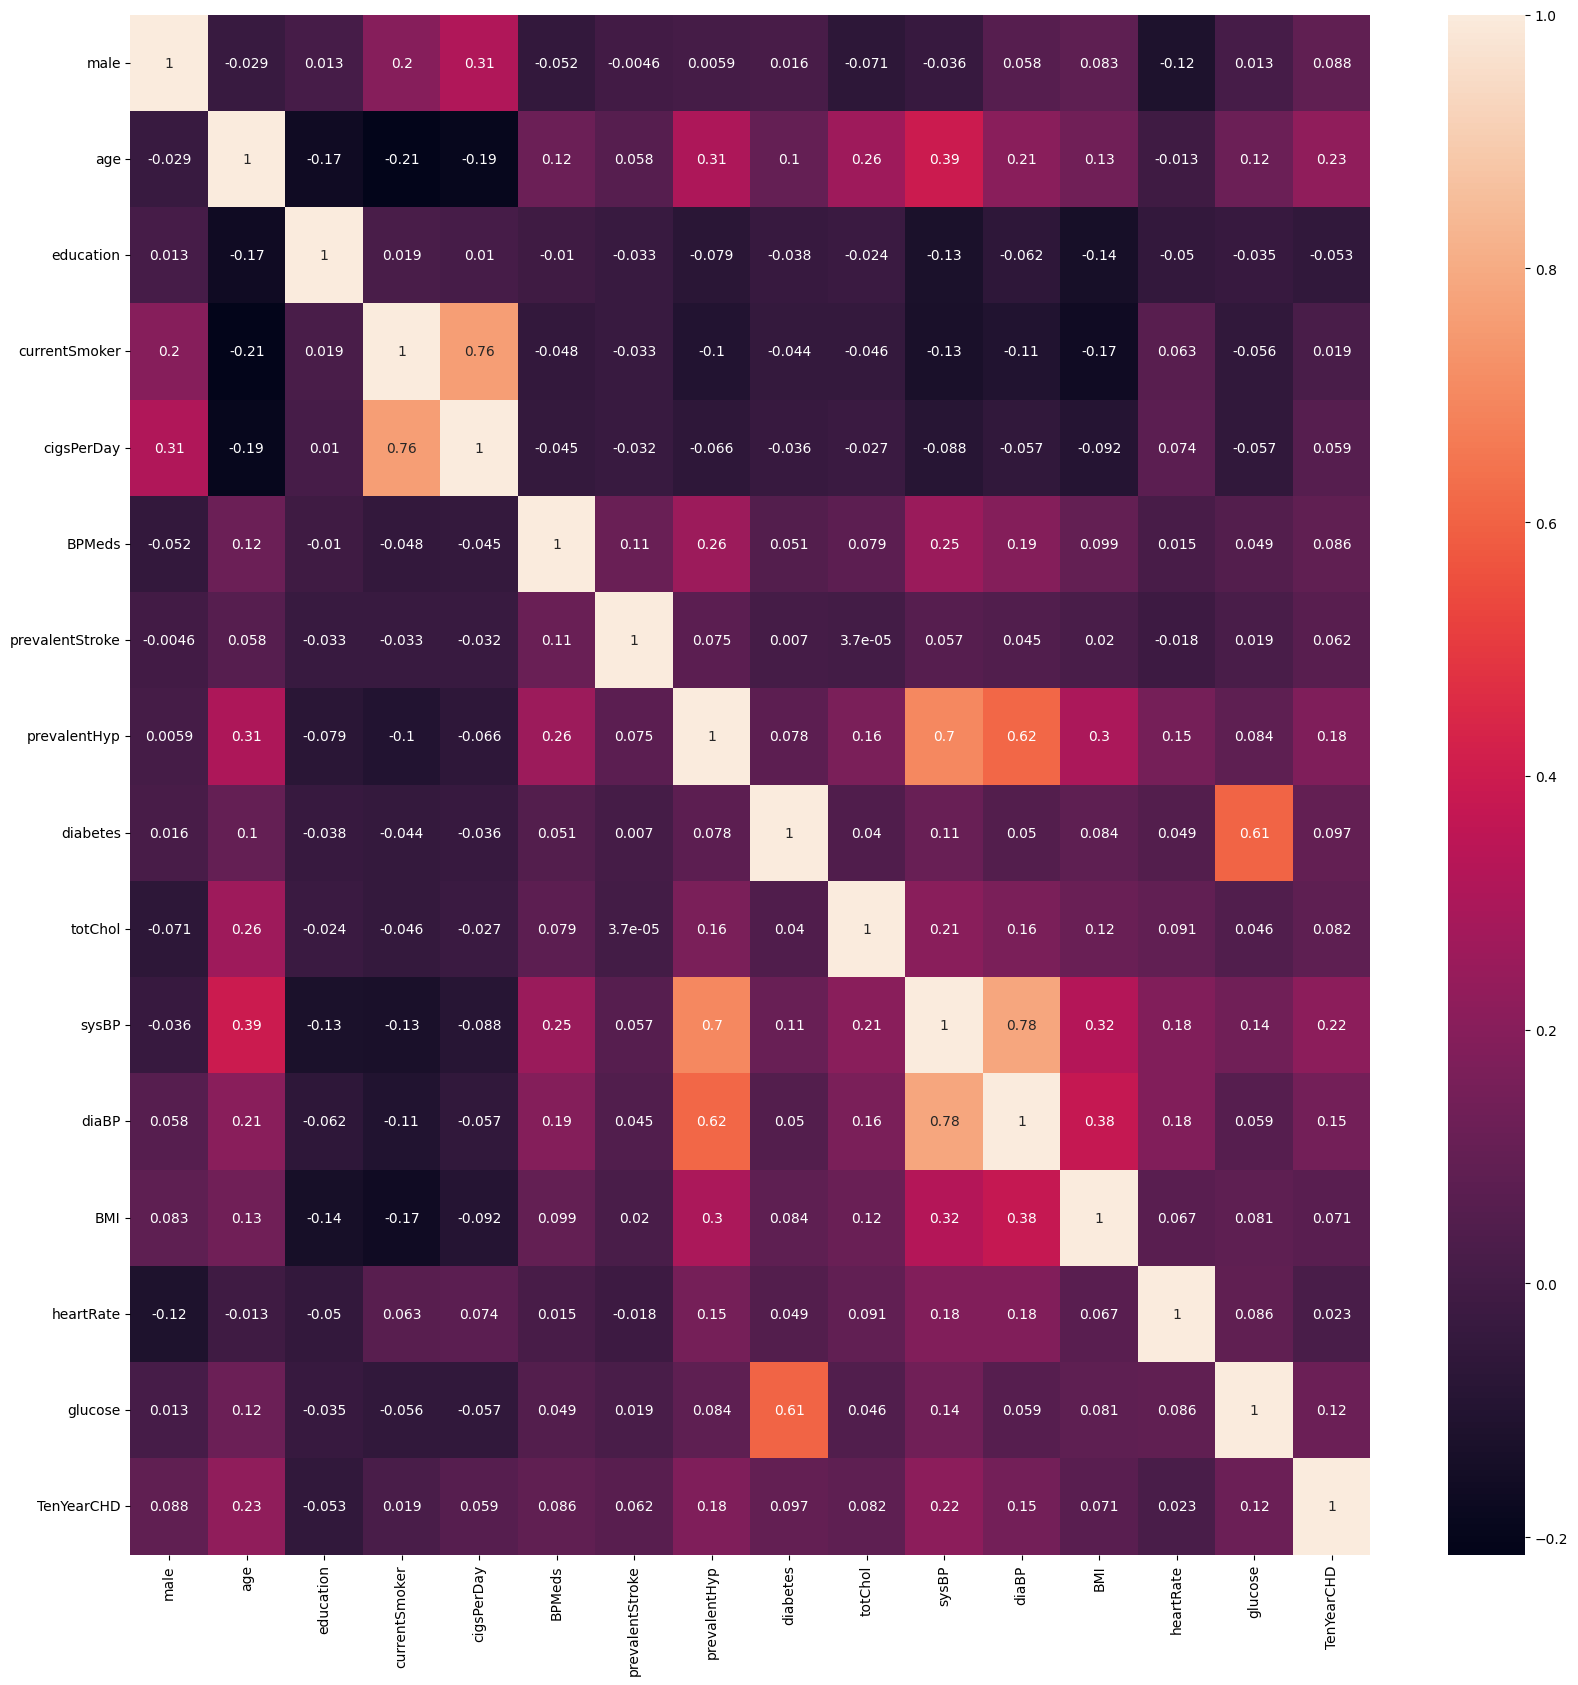

In [100]:
#plot heatmap to see the correlation between columns
plt.figure(figsize=(20, 20)) 
sns.heatmap(data_df.corr(),annot=True)
plt.show()

In [107]:
#splitting the data 
X = data_df.iloc[:, :-1]
y = data_df.iloc[: , -1]
X = preprocessing.StandardScaler().fit(X).transform(X)

In [108]:
#splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) 
print(f'Train shape: {X_train.shape} {y_train.shape}')
print(f'Test shape: {X_test.shape} {y_test.shape}')

Train shape: (3392, 15) (3392,)
Test shape: (848, 15) (848,)


In [115]:
#Logistic Regression 
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [119]:
#predict with Logistic Regression and print accuracy score
y_pred = Lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred) * 100}% ')

Accuracy score: 85.49528301886792% 


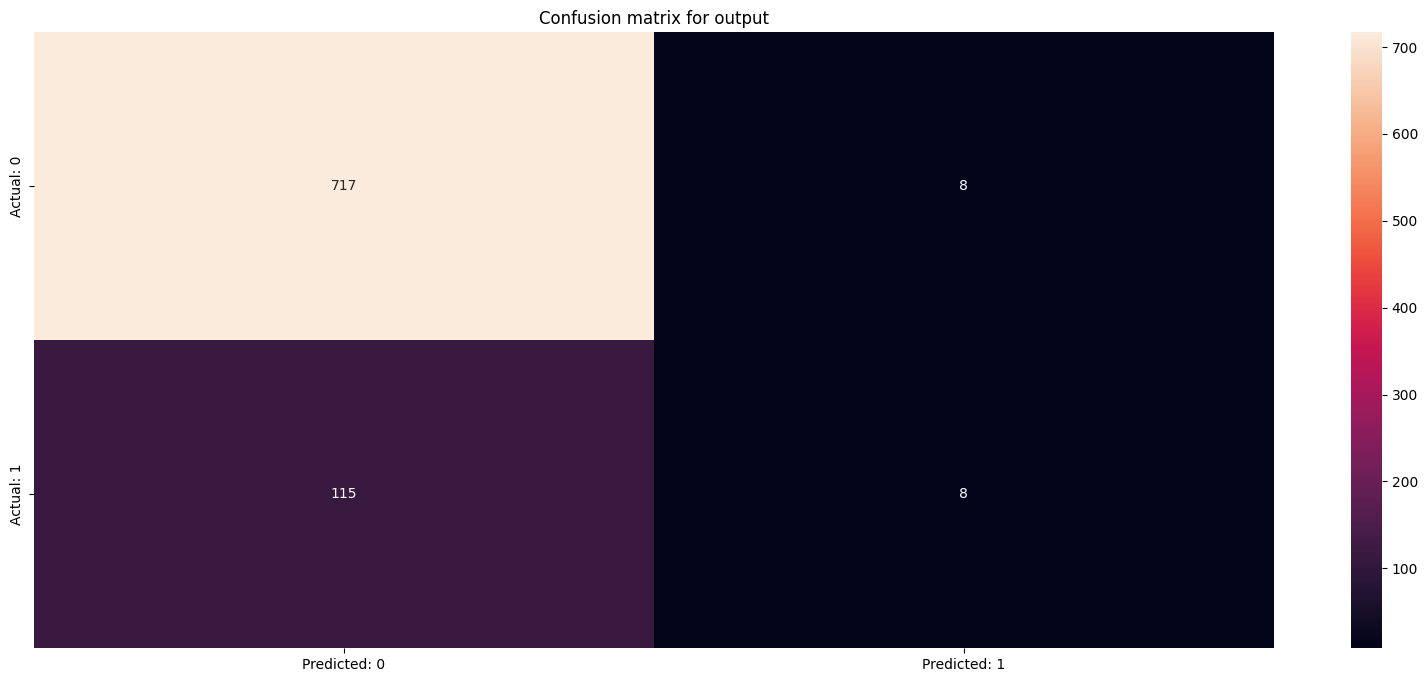

Classification report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.12       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848



In [123]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred)
schelet_confustion_matrix = pd.DataFrame (
    data = cm,
    columns = ['Predicted: 0', 'Predicted: 1'],
    index = ['Actual: 0', 'Actual: 1']
) 
plt.figure(figsize=(20, 8))
sns.heatmap(schelet_confustion_matrix, annot = True, fmt = 'd')
plt.title('Confusion matrix for output')
plt.show()

#classification_report
print(f'Classification report: {classification_report(y_test, y_pred)}')